In [1]:
%matplotlib inline

In [2]:
from __future__ import division

In [3]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import random as py_random
import patsy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

def examine_data_frame(df):
    for name in df.columns:
        print "----------"
        print df[ name].dtype
        if df[ name].dtype is np.dtype( 'O'):
            print df[ name].value_counts()
            print "Name: ", name
        else:
            print df[ name].describe()
            
def graph_boxplot(data, title):
    figure = plt.figure(figsize=(5,5))
    axes = figure.add_subplot(1, 1, 1)
    patch = axes.boxplot(data, labels=["Samples"], patch_artist=True)
    restyle_boxplot(patch)
    x = np.random.normal(1, 0.01, size=len(data))
    axes.set_title(title)
    axes.plot(x, data, 'o', alpha=0.4)
    plt.show()            
            
def restyle_boxplot(patch):
    ## change color and linewidth of the whiskers
    for whisker in patch['whiskers']:
        whisker.set(color='#000000', linewidth=1)

    ## change color and linewidth of the caps
    for cap in patch['caps']:
        cap.set(color='#000000', linewidth=1)

    ## change color and linewidth of the medians
    for median in patch['medians']:
        median.set(color='#000000', linewidth=2)

    ## change the style of fliers and their fill
    for flier in patch['fliers']:
        flier.set(marker='o', color='#000000', alpha=0.2)
        
        sns.set(style="darkgrid")
        
def graph_histogram(data, title, bins=None):
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 2, 1)
    if bins != None:
        axes.hist(data, bins=bins)
    else:
        axes.hist(data)
    axes.set_title(title)
    axes.set_ylabel( "Count")
    axes.set_xlabel( "Samples")
    axes = figure.add_subplot(1, 2, 2)
    if bins != None:
        axes.hist(data, bins=bins, normed=True)
    else:
        axes.hist(data, normed=True)
    axes.set_ylabel( "Density")
    axes.set_xlabel( "Samples")
    plt.show()
    
def graph_normal_ref(data):
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    values, base = np.histogram(data, bins=11, density=True)
    cumulative = np.cumsum(values)
    axes.plot( base[:-1], cumulative, color="steelblue")
    axes.set_xlim((np.min(data), np.max(data)))
    weight_mean = np.mean(data)
    weight_std = np.std(data)
    sampled_data = [weight_mean + r * weight_std for r in np.random.standard_normal(10000)]
    values2, base = np.histogram( sampled_data, bins=base, density=True)
    cumulative2 = np.cumsum( values2)
    axes.plot( base[:-1], cumulative2, color="firebrick")
    axes.set_xlim((np.min(data), np.max(data)))
    axes.set_xlabel( "Empirical v. Theoretical: Normal Distribution")
    plt.show()

# Student Loan Crisis

The data presented here comes from three main sources including the think-tank Hamilton Project and U.S. Department of Education, National Center for Education Statistics. Let's start by reading in the data, performing some ETL, and EDA.

In [4]:
# Read in debt per major data
df_debt = pd.read_csv("debt_per_major.csv", header=0)
df_debt['gpa'] = df_debt['gpa'] / 100

In [5]:
df_debt.head()

,major,gpa,salary_2009,salary_2012,cumulative_borrowed,cumulative_parent_plus
0,computer_and_information_sciences,3.304602,43569.2188,61594.8164,17560.0527,3581.7893
1,engineering_and_engineering_technology,3.232387,44370.2031,64573.0586,12864.1953,2913.3657
2,bio_and_phys_science_sci_tech_math_agriculture,3.281715,20545.1016,35908.4922,14352.4746,2852.5662
3,general_studies_and_other,3.146513,26109.5332,44028.3828,15052.8174,2873.1206
4,social_sciences,3.198074,22716.9707,36107.1172,15205.6670,3449.5522


In [6]:
df_debt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
major                     10 non-null object
gpa                       10 non-null float64
salary_2009               10 non-null float64
salary_2012               10 non-null float64
cumulative_borrowed       10 non-null float64
cumulative_parent_plus    10 non-null float64
dtypes: float64(5), object(1)
memory usage: 552.0+ bytes


In [7]:
examine_data_frame(df_debt)

----------
object
bio_and_phys_science_sci_tech_math_agriculture    1
other_applied                                     1
education                                         1
general_studies_and_other                         1
computer_and_information_sciences                 1
humanities                                        1
business                                          1
social_sciences                                   1
engineering_and_engineering_technology            1
health_care_fields                                1
Name: major, dtype: int64
Name:  major
----------
float64
count    10.000000
mean      3.270619
std       0.085127
min       3.146513
25%       3.206652
50%       3.261392
75%       3.319316
max       3.408367
Name: gpa, dtype: float64
----------
float64
count       10.000000
mean     30250.905080
std       9327.786507
min      19027.589800
25%      23484.377925
50%      26665.714850
75%      37194.917975
max      44370.203100
Name: salary_2009, dtype: float

In [8]:
# Read in earnings over careers (earnings in 000s)
df_earnings = pd.read_csv("earnings_over_career_by_major.csv", header=0)
# Convert earnings to thousands
for key in df_earnings.keys()[1:]:
    df_earnings[key] = df_earnings[key] * 1000

In [9]:
df_earnings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
major               80 non-null object
initial_earnings    80 non-null float64
year_6_earnings     80 non-null float64
year_11_earnings    80 non-null float64
year_26_earnings    80 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.2+ KB


In [10]:
df_earnings.head()

,major,initial_earnings,year_6_earnings,year_11_earnings,year_26_earnings
0,accounting_and_actuarial_science,37300.0,52900.0,63900.0,70400.0
1,advertising_and_public_relations,25500.0,45200.0,56000.0,59200.0
2,aerospace_engineering,39900.0,71400.0,90500.0,111700.0
3,agricultural_economics,29100.0,48600.0,58900.0,64800.0
4,animal_sciences,26200.0,35500.0,46100.0,51900.0


In [11]:
examine_data_frame(df_earnings)

----------
object
history                                                1
art_history_and_criticism                              1
english_language_and_literature                        1
human_resources_and_personnel_management               1
animal_sciences                                        1
computer_engineering                                   1
public_administration_and_policy                       1
botany_ecology_and_zoology                             1
general_agriculture                                    1
communication_technologies                             1
music                                                  1
special_needs_education                                1
energy_and_extraction_engineering                      1
mechanical_engineering                                 1
treatment_therapy_professions                          1
language_and_drama_education                           1
anthropology_and_archeology                            1
industrial_an

In [12]:
# Read in data about percent increase that a graduate degree gets you
df_graduate = pd.read_csv("graduate_degree_wage_premium.csv", header=None, names=['major', 'percent_wage_increase'])

In [13]:
df_graduate.head()

,major,percent_wage_increase
0,health_and_medical_preparatory_programs,137.0
1,zoology,79.3
2,biology,71.4
3,biochemical_sciences,64.4
4,molecular_biology,63.0


In [14]:
df_graduate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
major                    137 non-null object
percent_wage_increase    137 non-null float64
dtypes: float64(1), object(1)
memory usage: 2.2+ KB


In [15]:
examine_data_frame(df_graduate)

----------
object
geosciences                                      1
general_education                                1
physical_fitness_parks_recreation_and_leisure    1
philosophy_and_religious_studies                 1
operations_logistics_and_e-commerce              1
general_engineering                              1
art_and_music_education                          1
agricultural_economics                           1
composition_and_speech                           1
history                                          1
early_childhood_education                        1
social_psychology                                1
hospitality_management                           1
plant_science_and_agronomy                       1
miscellaneous_engineering                        1
biochemical_sciences                             1
natural_resources_management                     1
management_information_systems_and_statistics    1
interdisciplinary_social_sciences                1
film_video_an

In [16]:
df_lifetime = pd.read_csv("lifetime_earnings_per_major.csv", header=0)
for key in df_lifetime.keys()[1:]:
    df_lifetime[key] = df_lifetime[key] * 1000000

In [17]:
df_lifetime.head()

,major,25th_percentile,50th_percentile,75th_percentile,90th_percentile
0,accounting_and_actuarial_science,880000.0,1410000.0,2110000.0,3170000.0
1,advertising_and_public_relations,690000.0,1160000.0,1800000.0,2680000.0
2,aerospace_engineering,1460000.0,2060000.0,2610000.0,3460000.0
3,agricultural_economics,820000.0,1270000.0,1860000.0,2860000.0
4,animal_sciences,630000.0,1010000.0,1520000.0,2110000.0


In [18]:
df_lifetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
major              81 non-null object
25th_percentile    81 non-null float64
50th_percentile    81 non-null float64
75th_percentile    81 non-null float64
90th_percentile    81 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.2+ KB


In [19]:
examine_data_frame(df_lifetime)

----------
object
history                                                1
elementary_education                                   1
accounting_and_actuarial_science                       1
english_language_and_literature                        1
human_resources_and_personnel_management               1
animal_sciences                                        1
computer_engineering                                   1
public_administration_and_policy                       1
botany_ecology_and_zoology                             1
general_agriculture                                    1
communication_technologies                             1
music                                                  1
area_ethnic_and_civilization_studies                   1
energy_and_extraction_engineering                      1
mechanical_engineering                                 1
medical_technologies_and_assistance                    1
treatment_therapy_professions                          1
language_and_

In [20]:
df_unemployment = pd.read_csv("unemployment_by_major.csv", header=None, names=["major", "unemployment_rate"])

In [21]:
df_unemployment.head()

,major,unemployment_rate
0,agriculture_and_natural_resources,7.0
1,science_life,7.7
2,architecture,13.9
3,humanities_and_liberal_arts,9.4
4,communications_journalism,7.3


In [22]:
df_unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
major                15 non-null object
unemployment_rate    15 non-null float64
dtypes: float64(1), object(1)
memory usage: 312.0+ bytes


In [23]:
examine_data_frame(df_unemployment)

----------
object
humanities_and_liberal_arts          1
architecture                         1
education                            1
science_life                         1
engineering                          1
arts                                 1
communications_journalism            1
social_science                       1
computers_and_mathematics            1
psychology_and_social_work           1
agriculture_and_natural_resources    1
health                               1
business                             1
law_and_public_policy                1
recreation                           1
Name: major, dtype: int64
Name:  major
----------
float64
count    15.000000
mean      8.193333
std       2.120804
min       5.400000
25%       7.300000
50%       7.700000
75%       8.600000
max      13.900000
Name: unemployment_rate, dtype: float64


In [24]:
# Default rates per major
df_defaults = pd.read_csv("default_rates_by_major.csv", header=0)

In [25]:
df_defaults.head()

,major,did_not_borrow,deferring_payments_on_loans,repaying_loans,loans_are_paid_off_or_forgiven,defaulted
0,computer_and_information_sciences,30.3687,7.6358,44.8045,16.0163,1.1747
1,engineering_and_engineering_technology,38.9754,5.9280,39.0945,15.3305,0.6716
2,bio_and_phys_science_sci_tech_math_agriculture,28.7922,22.2900,36.5304,10.8443,1.5431
3,general_studies_and_other,30.4578,14.5722,43.1735,9.9553,1.8413
4,social_sciences,25.4022,17.7444,46.1011,8.1296,2.6227


In [26]:
df_defaults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
major                             10 non-null object
did_not_borrow                    10 non-null float64
deferring_payments_on_loans       10 non-null float64
repaying_loans                    10 non-null float64
loans_are_paid_off_or_forgiven    10 non-null float64
defaulted                         10 non-null float64
dtypes: float64(5), object(1)
memory usage: 552.0+ bytes


In [27]:
examine_data_frame(df_defaults)

----------
object
bio_and_phys_science_sci_tech_math_agriculture    1
other_applied                                     1
education                                         1
general_studies_and_other                         1
computer_and_information_sciences                 1
humanities                                        1
business                                          1
social_sciences                                   1
engineering_and_engineering_technology            1
health_care_fields                                1
Name: major, dtype: int64
Name:  major
----------
float64
count    10.000000
mean     29.028250
std       4.336745
min      24.062000
25%      26.058475
50%      28.819450
75%      30.435525
max      38.975400
Name: did_not_borrow, dtype: float64
----------
float64
count    10.00000
mean     13.35851
std       4.95381
min       5.92800
25%      10.83165
50%      12.58800
75%      16.95135
max      22.29000
Name: deferring_payments_on_loans, dtype: float64
--

Let's generate some boxplots of the data frames to get a feel for the spread of values:

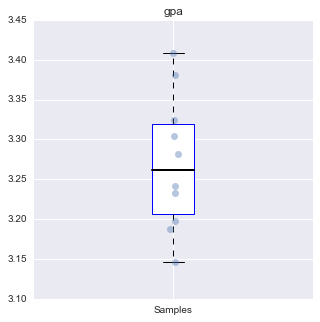

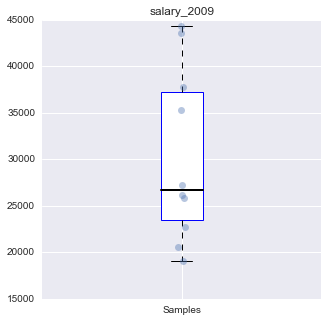

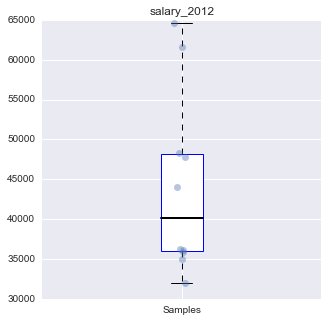

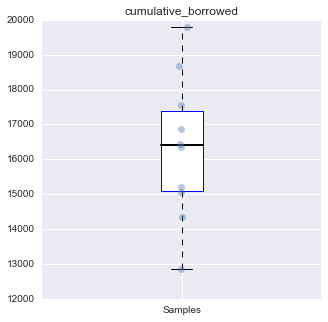

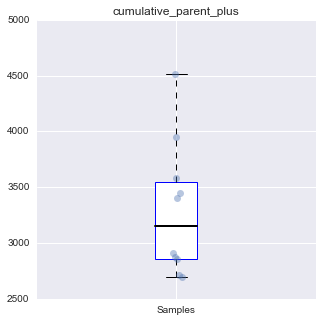

In [28]:
for key in df_debt.keys()[1:]:
    graph_boxplot(df_debt[key], key)

From these boxplots, we can see that GPA is pretty consistent across majors and solidly between in the low 3.00s. The lack of variation might make it hard to use for prediction. The salary numbers have the most variation of the attributes in this dataframe. The variation of the cumulative amount borrowed and Parent PLUS loans is relatively small across majors suggesting that the debt per major is about the same. This makes a certain degree of sense since costs between most majors aren't normally much different.

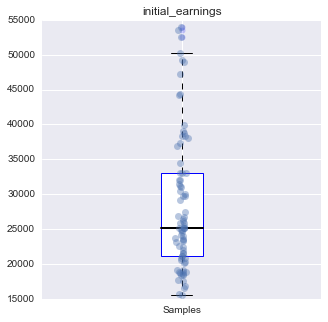

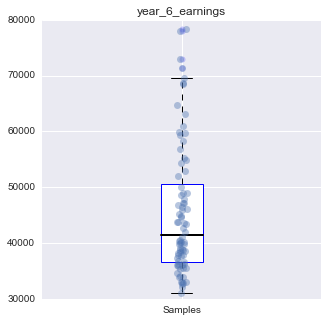

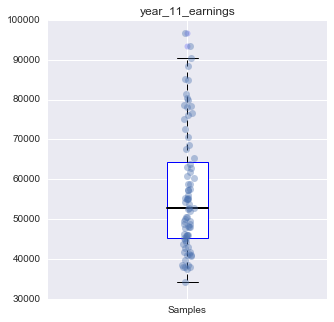

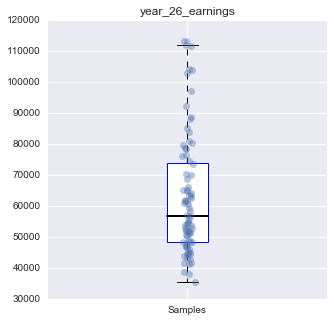

In [29]:
for key in df_earnings.keys()[1:]:
    graph_boxplot(df_earnings[key], key)

Its interesting to note that the range from the first and third quartiles slightly increases as number of years since graduation increases.

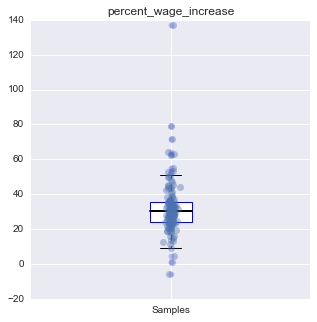

In [30]:
for key in df_graduate.keys()[1:]:
    graph_boxplot(df_graduate[key], key)

The pay increase one receives from a getting a graduate degree definitely considers a few outliers on both ends of the extreme. This should be kept in mind when uses this data in analysis.

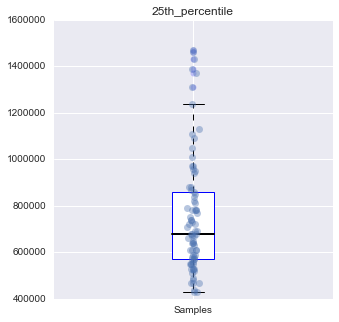

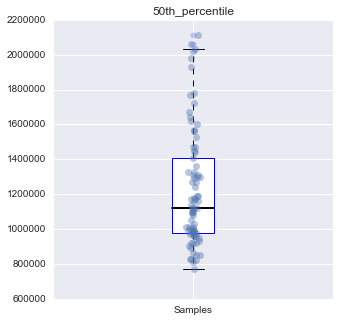

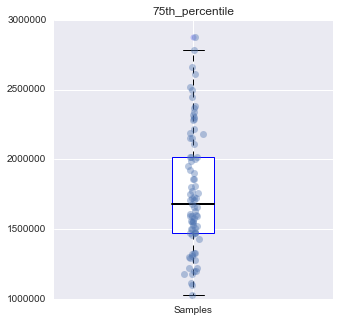

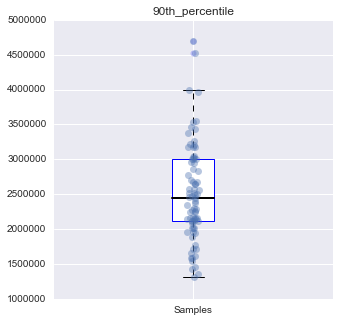

In [31]:
for key in df_lifetime.keys()[1:]:
    graph_boxplot(df_lifetime[key], key)

As we can see, the variation, defined as the difference between the third and first quartile, increases over percentiles, which is expected since the tail of the distribution becomes more influential.

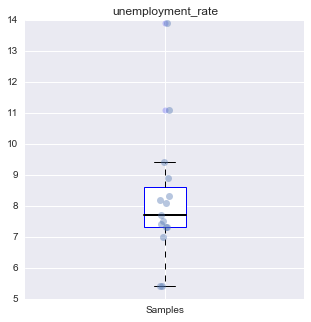

In [32]:
for key in df_unemployment.keys()[1:]:
    graph_boxplot(df_unemployment[key], key)

The unemployment data has a few outliers at the upper extreme but is pretty consistent around ~8% for all majors.

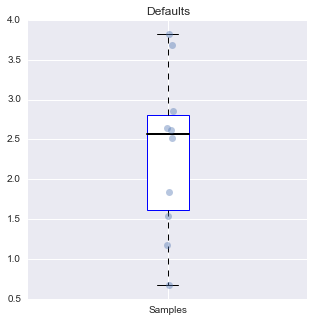

In [33]:
graph_boxplot(df_defaults['defaulted'], 'Defaults')

For default rates, it looks like the average is bias towards the third quartile which may suggest right-centered distribution.

Now, let's explore the potential distributions these attributes are based on:

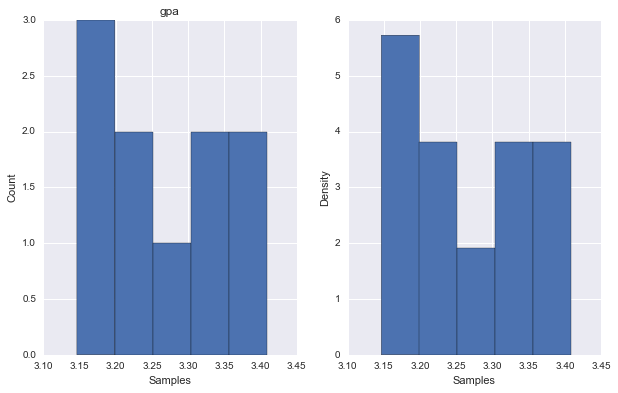

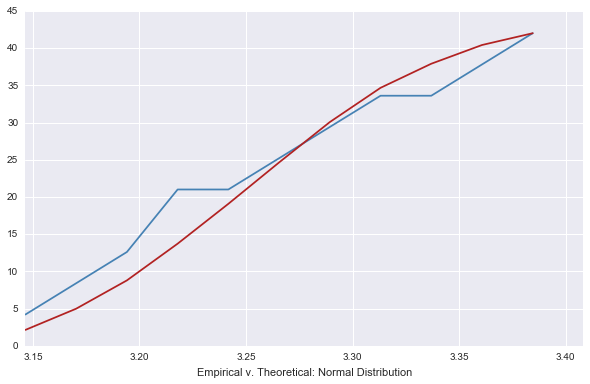

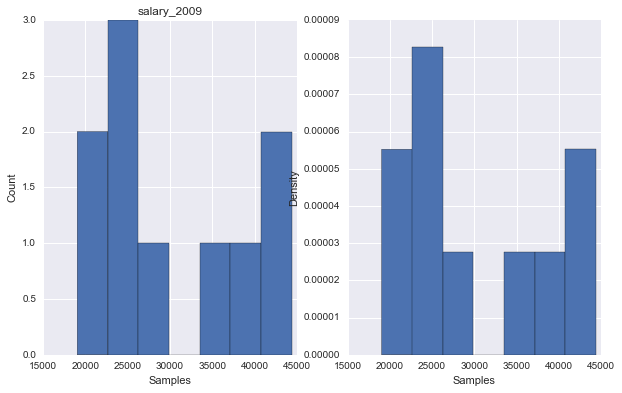

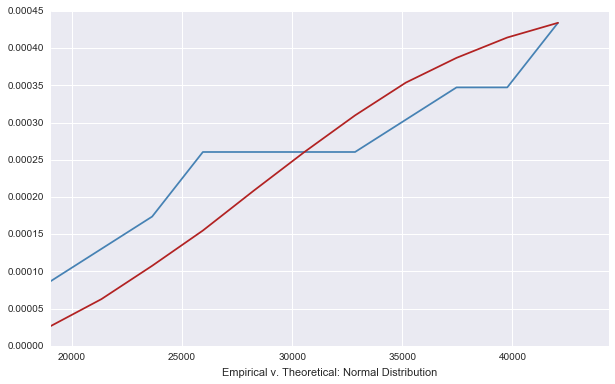

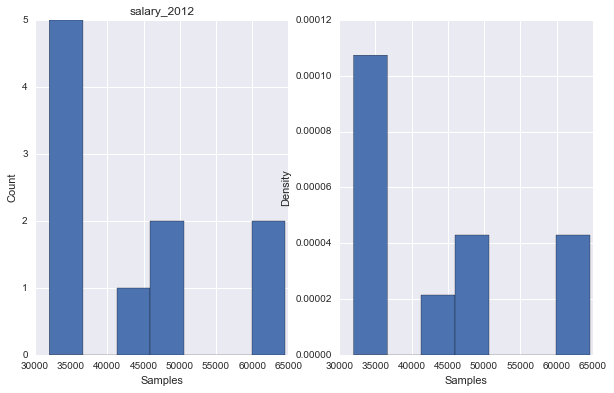

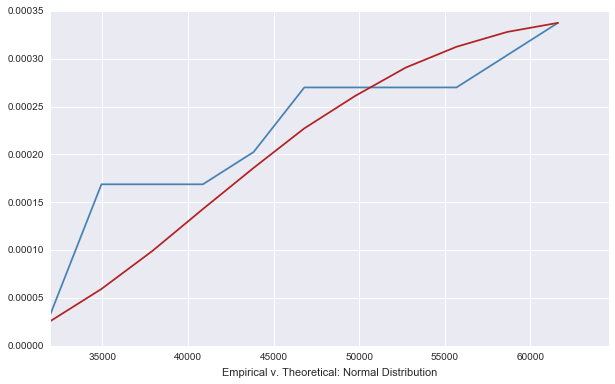

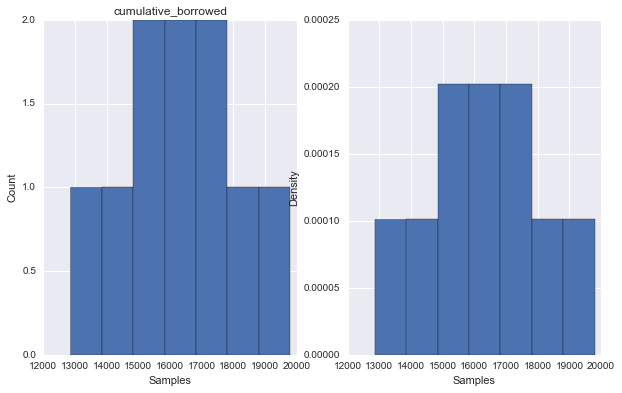

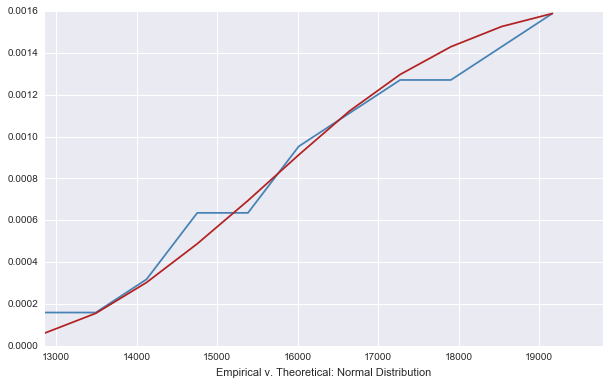

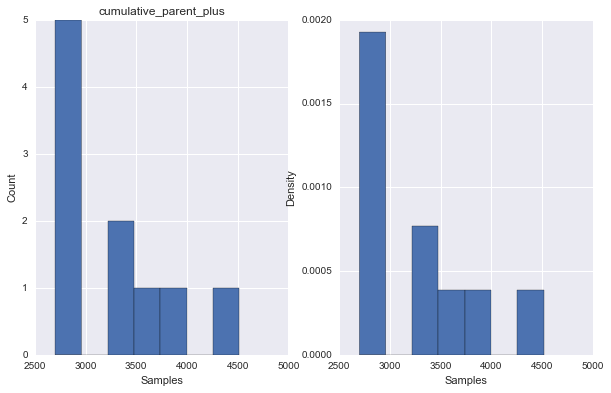

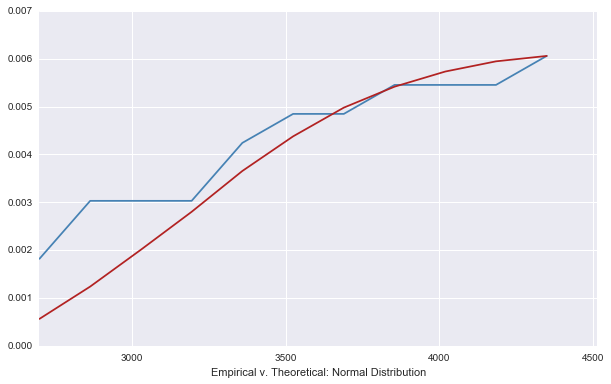

In [34]:
bins = dict()
for key in df_debt.keys()[1:]:
    num = 0
    if key == 'gpa':
        num = 5
    elif key == 'salary_2009':
        num = 7
    elif key == 'salary_2012':
        num = 7
    else:
        num = 7
    bins[key] = num
for key in df_debt.keys()[1:]:
    graph_histogram(df_debt[key], key, bins[key])
    graph_normal_ref(df_debt[key])

Its tough to generalize with this dataframe because it only contains 10 rows but it looks like GPA might be a uniform distribution. The salary attributes looks like they may be distributed according to a geometric or log normal distribution. Cumulative loan amounts look to be normally distributed and cumulative parent PLUS loan amounts looks to be exponentially distributed. 

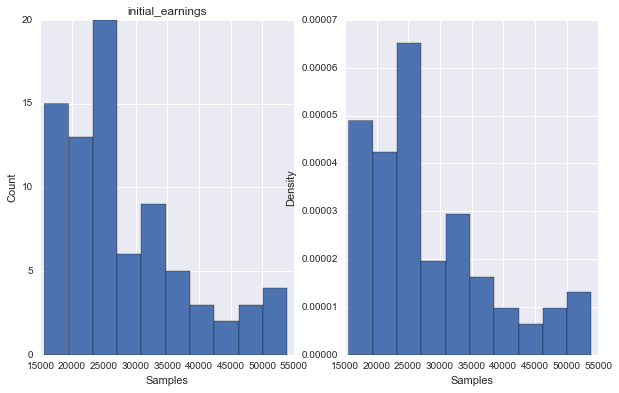

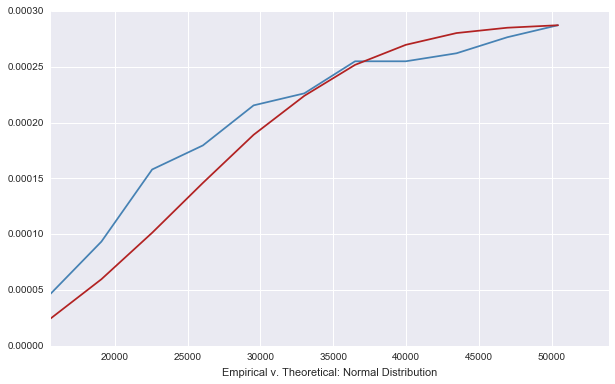

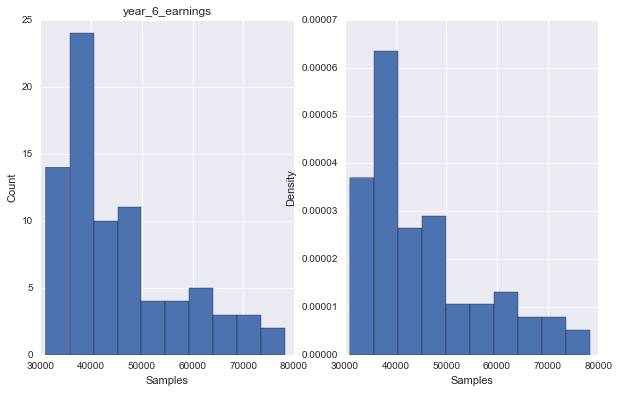

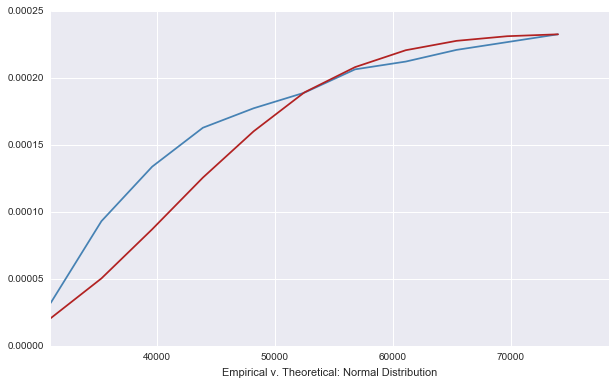

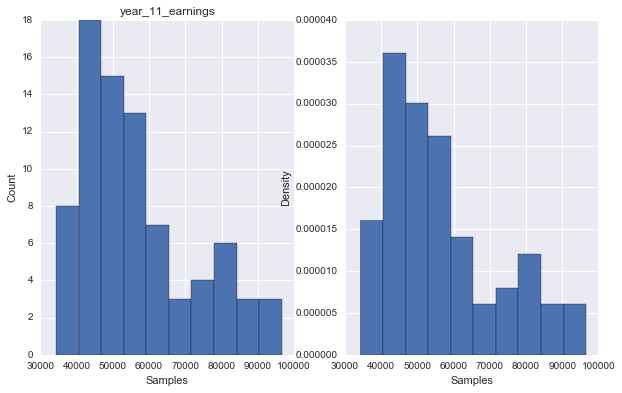

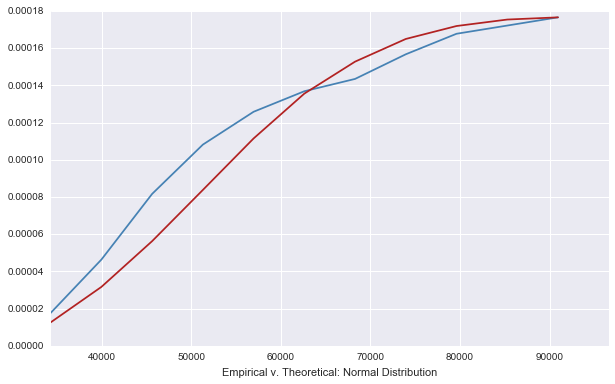

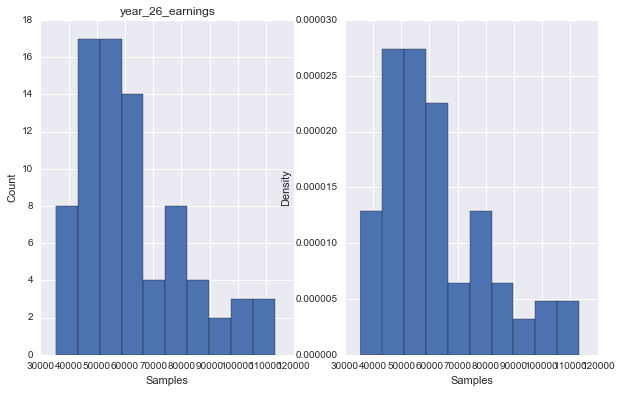

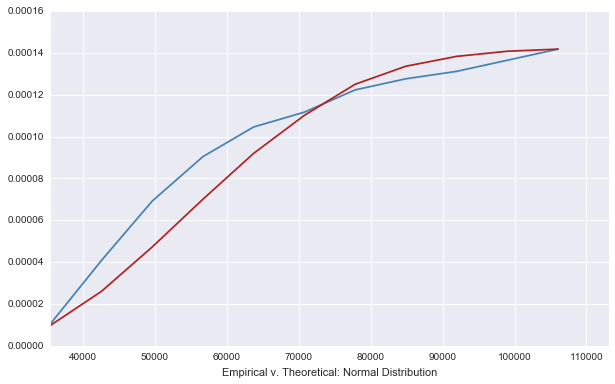

In [35]:
for key in df_earnings.keys()[1:]:
    graph_histogram(df_earnings[key], key)
    graph_normal_ref(df_earnings[key])

It looks like salary is distributed according to the normal distribution.

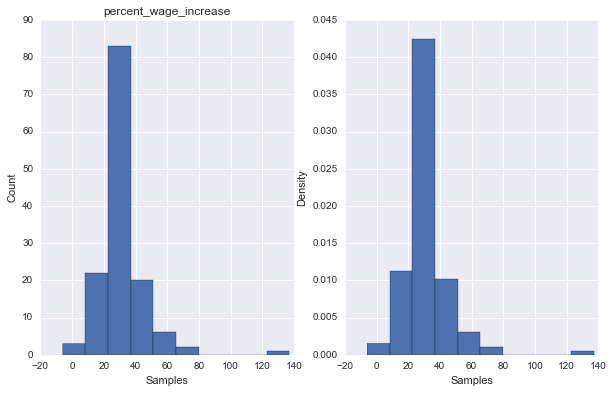

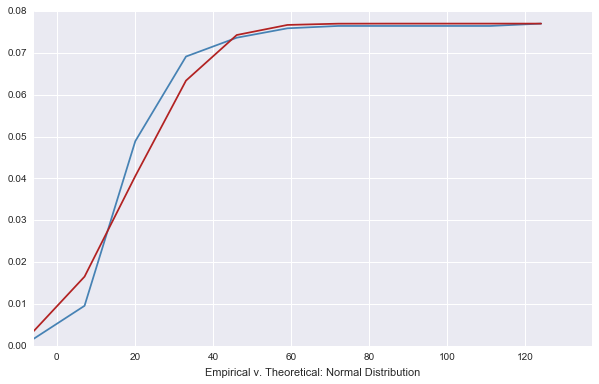

In [36]:
for key in df_graduate.keys()[1:]:
    graph_histogram(df_graduate[key], key)
    graph_normal_ref(df_graduate[key])

Graduate raises looks to be distributed according to the normal distribution.

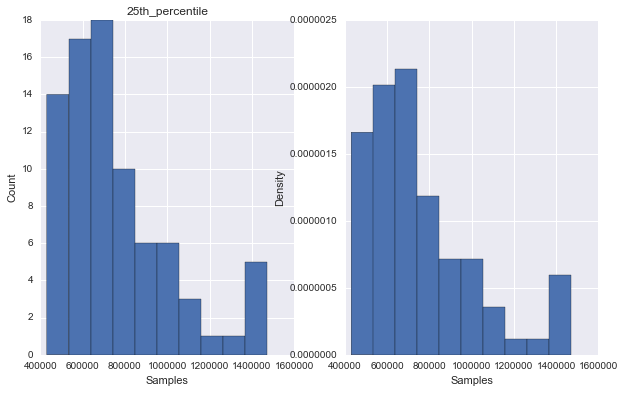

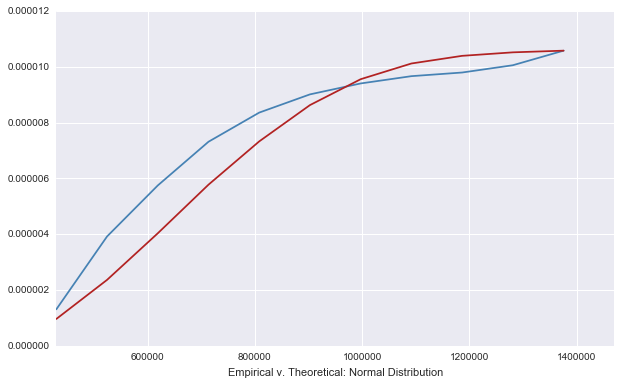

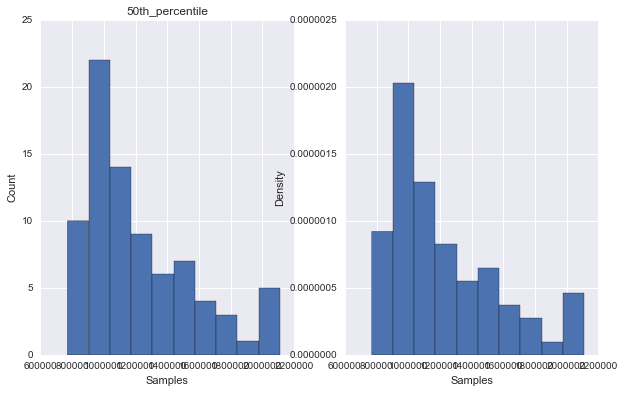

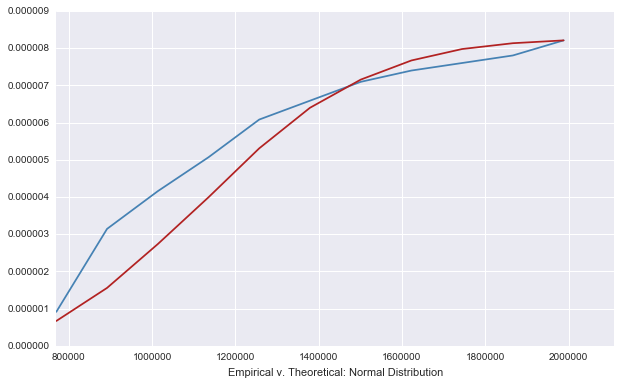

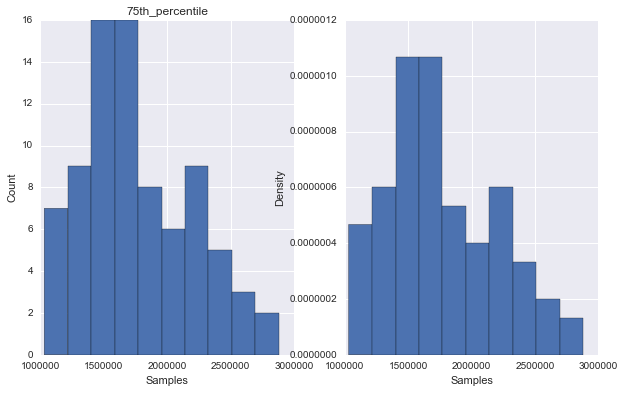

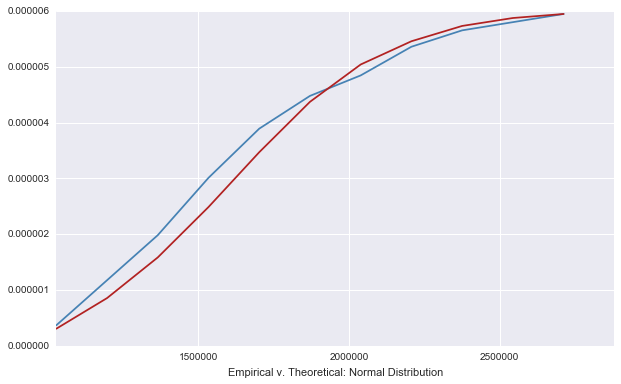

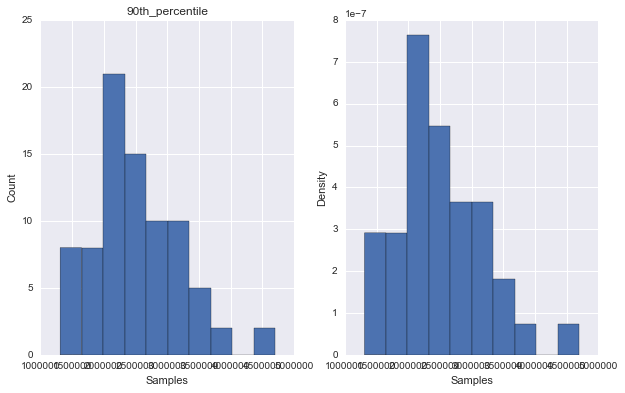

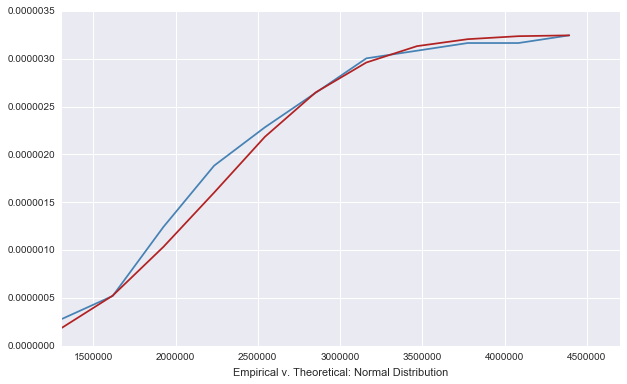

In [37]:
for key in df_lifetime.keys()[1:]:
    graph_histogram(df_lifetime[key], key)
    graph_normal_ref(df_lifetime[key])

Earnings over a lifetime seems also to be distributed according to the gamma distribution, which makes sense since wages looked to be distributed according the gamma distribution.

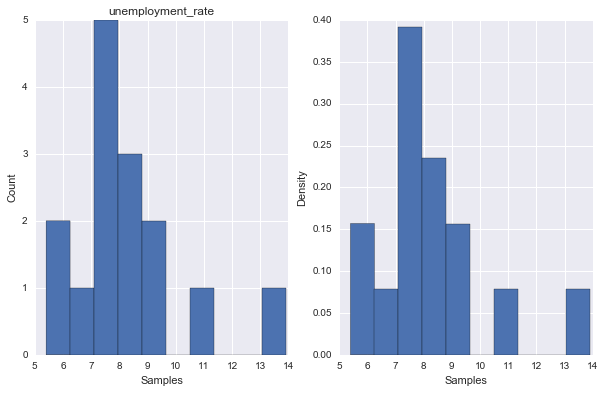

In [38]:
for key in df_unemployment.keys()[1:]:
    graph_histogram(df_unemployment[key], key)

Unemployment looks like the either a normal or gamma distribution.

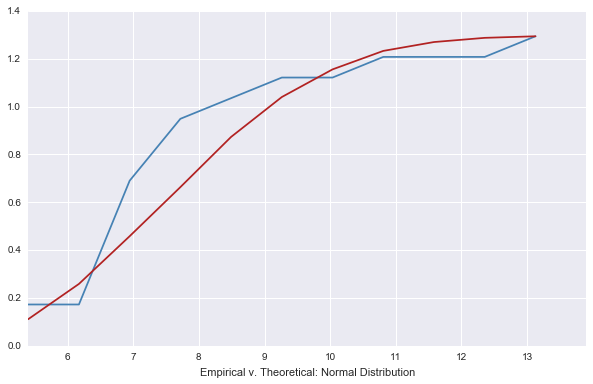

In [39]:
graph_normal_ref(df_unemployment['unemployment_rate'])

Due to the poor fit to the normal distribution, I would say it is looks closer to a gamma distribution.

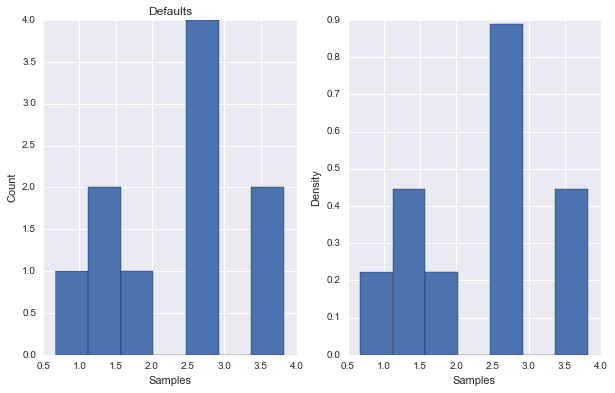

In [40]:
graph_histogram(df_defaults['defaulted'], 'Defaults', 7)

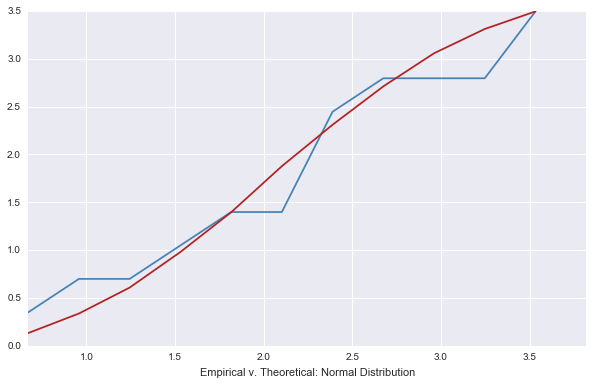

In [41]:
graph_normal_ref(df_defaults['defaulted'])

I think the way in which the data followed the reference normal distribution line indicates a normal distribution, right-centered.

Having checked out each variable by its own, I'd liked to start investigating some relationships between the attributes. To do this, I need to combine the data frames into one frame. The only problem that needs addressed in order to do this is the different values for 'major' that each frame has. Because I'm trying to estimate the default rates for each major, I'm going to map each data frame to the majors listed in the df_defaults data frame. The majors it uses are:

In [42]:
df_defaults['major'].value_counts()

bio_and_phys_science_sci_tech_math_agriculture    1
other_applied                                     1
education                                         1
general_studies_and_other                         1
computer_and_information_sciences                 1
humanities                                        1
business                                          1
social_sciences                                   1
engineering_and_engineering_technology            1
health_care_fields                                1
Name: major, dtype: int64

In [43]:
df_lifetime['major'].value_counts()

history                                                1
elementary_education                                   1
accounting_and_actuarial_science                       1
english_language_and_literature                        1
human_resources_and_personnel_management               1
animal_sciences                                        1
computer_engineering                                   1
public_administration_and_policy                       1
botany_ecology_and_zoology                             1
general_agriculture                                    1
communication_technologies                             1
music                                                  1
area_ethnic_and_civilization_studies                   1
energy_and_extraction_engineering                      1
mechanical_engineering                                 1
medical_technologies_and_assistance                    1
treatment_therapy_professions                          1
language_and_drama_education   

In [44]:
df_graduate['major'].value_counts()

geosciences                                      1
general_education                                1
physical_fitness_parks_recreation_and_leisure    1
philosophy_and_religious_studies                 1
operations_logistics_and_e-commerce              1
general_engineering                              1
art_and_music_education                          1
agricultural_economics                           1
composition_and_speech                           1
history                                          1
early_childhood_education                        1
social_psychology                                1
hospitality_management                           1
plant_science_and_agronomy                       1
miscellaneous_engineering                        1
biochemical_sciences                             1
natural_resources_management                     1
management_information_systems_and_statistics    1
interdisciplinary_social_sciences                1
film_video_and_photographic_art

In [45]:
df_debt['major'].value_counts()

bio_and_phys_science_sci_tech_math_agriculture    1
other_applied                                     1
education                                         1
general_studies_and_other                         1
computer_and_information_sciences                 1
humanities                                        1
business                                          1
social_sciences                                   1
engineering_and_engineering_technology            1
health_care_fields                                1
Name: major, dtype: int64

In [46]:
df_earnings['major'].value_counts()

history                                                1
art_history_and_criticism                              1
english_language_and_literature                        1
human_resources_and_personnel_management               1
animal_sciences                                        1
computer_engineering                                   1
public_administration_and_policy                       1
botany_ecology_and_zoology                             1
general_agriculture                                    1
communication_technologies                             1
music                                                  1
special_needs_education                                1
energy_and_extraction_engineering                      1
mechanical_engineering                                 1
treatment_therapy_professions                          1
language_and_drama_education                           1
anthropology_and_archeology                            1
industrial_and_manufacturing_en

In [47]:
df_unemployment['major'].value_counts()

humanities_and_liberal_arts          1
architecture                         1
education                            1
science_life                         1
engineering                          1
arts                                 1
communications_journalism            1
social_science                       1
computers_and_mathematics            1
psychology_and_social_work           1
agriculture_and_natural_resources    1
health                               1
business                             1
law_and_public_policy                1
recreation                           1
Name: major, dtype: int64

In [48]:
df_unemployment = df_unemployment.replace('engineering', 'engineering_and_engineering_technology')
df_unemployment = df_unemployment.replace('science_life', 'bio_and_phys_science_sci_tech_math_agriculture')
df_unemployment = df_unemployment.replace('agriculture_and_natural_resources', 'bio_and_phys_science_sci_tech_math_agriculture')
df_unemployment = df_unemployment.replace('architecture', 'engineering_and_engineering_technology')
df_unemployment = df_unemployment.replace('social_science', 'social_sciences')
df_unemployment = df_unemployment.replace('health', 'health_care_fields')
df_unemployment = df_unemployment.replace('computers_and_mathematics','computer_and_information_sciences')
df_unemployment = df_unemployment.replace('humanities_and_liberal_arts', 'humanities')
df_unemployment = df_unemployment.replace('psychology_and_social_work', 'social_sciences')
df_unemployment = df_unemployment.replace('communications_journalism', 'general_studies_and_other')
df_unemployment = df_unemployment.replace('law_and_public_policy', 'other_applied')
df_unemployment = df_unemployment.replace('recreation', 'general_studies_and_other')
df_unemployment = df_unemployment.replace('arts', 'general_studies_and_other')
df_unemployment = df_unemployment.groupby(df_unemployment.major, as_index=False).mean()
print df_unemployment

                                            major  unemployment_rate
0  bio_and_phys_science_sci_tech_math_agriculture               7.35
1                                        business               7.40
2               computer_and_information_sciences               8.20
3                                       education               5.40
4          engineering_and_engineering_technology              10.70
5                       general_studies_and_other               8.90
6                              health_care_fields               5.40
7                                      humanities               9.40
8                                   other_applied               8.10
9                                 social_sciences               8.10


In [49]:
for row in df_earnings['major']:
    if 'engineering' in row or \
       'communication_technologies' in row or \
       'production_and_transportation_technologies' in row or \
       'architecture' in row or \
       'medical_technologies' in row:
        df_earnings = df_earnings.replace(row, 'engineering_and_engineering_technology')
    elif 'business' in row:
        df_earnings = df_earnings.replace(row, 'business')
    elif 'education' in row:
        df_earnings = df_earnings.replace(row, 'education')
    elif 'health' in row or \
         'physical_fitness_nutrition_and_sports_studies' in row or \
         'treatment_therapy_professions' in row or \
         'nursing' in row:
        df_earnings = df_earnings.replace(row, 'health_care_fields')
    elif 'animal_sciences' in row or \
         'chemistry' in row or \
         'geography' in row or \
         'earth_and_other_physical_sciences' in row or \
         'biology' in row or \
         'general_agriculture' in row or \
         'physics' in row or \
         'botany_ecology_and_zoology' in row or \
         'environment_and_natural_resources' in row or \
         'multidisciplinary_science' in row or \
         'mathematics_and_statistics' in row or \
         'anthropology_and_archeology' in row or \
         'biochemistry_and_molecular_biology' in row:
        df_earnings = df_earnings.replace(row, 'bio_and_phys_science_sci_tech_math_agriculture') 
    elif 'computer_science' in row:
        df_earnings = df_earnings.replace(row, 'computer_and_information_sciences')
    elif 'accounting_and_actuarial_science' in row or \
         'agricultural_economics' in row or \
         'advertising_and_public_relations' in row or \
         'economics' in row or \
         'finance' in row or \
         'hospitality_management' in row or \
         'marketing_and_marketing_research' in row or \
         'operations_and_logistics' in row or \
         'human_resources_and_personnel_management' in row:
        df_earnings = df_earnings.replace(row, 'business')
    elif 'civilization_studies' in row or \
         'art_history_and_criticism' in row or \
         'drama_and_theater_arts' in row or \
         'english_language_and_literature' in row or \
         'fine_and_studio_arts' in row or \
         'music' in row or \
         'history' in row or \
         'philosophy_and_religious_studies' in row or \
         'liberal_arts' in row:
        df_earnings = df_earnings.replace(row, 'humanities')
    elif 'political_science_and_government' in row or \
         'sociology' in row or \
         'psychology' in row:
        df_earnings = df_earnings.replace(row, 'social_sciences')
    elif 'composition_and_speech' in row or \
         'theology_and_religious_vocations' in row or \
         'film_video_and_photographic_arts' in row or \
         'communications' in row or \
         'linguistics_and_foreign_languages' in row or \
         'mass_media' in row or \
         'criminology_and_criminal_justice' in row or \
         'commercial_art_and_graphic_design' in row or \
         'social_work' in row or \
         'family_and_consumer_sciences' in row:
        df_earnings = df_earnings.replace(row, 'general_studies_and_other')
    elif 'construction_services' in row or \
         'journalism' in row or \
         'public_administration_and_policy' in row:
        df_earnings = df_earnings.replace(row, 'other_applied')
df_earnings = df_earnings.groupby(df_earnings.major, as_index=False).mean()

In [50]:
for row in df_lifetime['major']:
    if 'engineering' in row or \
       'communication_technologies' in row or \
       'production_and_transportation_technologies' in row or \
       'architecture' in row or \
       'medical_technologies' in row:
        df_earnings = df_earnings.replace(row, 'engineering_and_engineering_technology')
    elif 'business' in row:
        df_lifetime = df_earnings.replace(row, 'business')
    elif 'education' in row:
        df_lifetime = df_earnings.replace(row, 'education')
    elif 'health' in row or \
         'physical_fitness_nutrition_and_sports_studies' in row or \
         'treatment_therapy_professions' in row or \
         'nursing' in row:
        df_lifetime = df_earnings.replace(row, 'health_care_fields')
    elif 'animal_sciences' in row or \
         'chemistry' in row or \
         'geography' in row or \
         'earth_and_other_physical_sciences' in row or \
         'biology' in row or \
         'general_agriculture' in row or \
         'physics' in row or \
         'botany_ecology_and_zoology' in row or \
         'environment_and_natural_resources' in row or \
         'multidisciplinary_science' in row or \
         'mathematics_and_statistics' in row or \
         'anthropology_and_archeology' in row or \
         'biochemistry_and_molecular_biology' in row:
        df_lifetime = df_earnings.replace(row, 'bio_and_phys_science_sci_tech_math_agriculture') 
    elif 'computer_science' in row:
        df_lifetime = df_earnings.replace(row, 'computer_and_information_sciences')
    elif 'accounting_and_actuarial_science' in row or \
         'agricultural_economics' in row or \
         'advertising_and_public_relations' in row or \
         'economics' in row or \
         'finance' in row or \
         'hospitality_management' in row or \
         'marketing_and_marketing_research' in row or \
         'operations_and_logistics' in row or \
         'human_resources_and_personnel_management' in row:
        df_lifetime = df_earnings.replace(row, 'business')
    elif 'civilization_studies' in row or \
         'art_history_and_criticism' in row or \
         'drama_and_theater_arts' in row or \
         'english_language_and_literature' in row or \
         'fine_and_studio_arts' in row or \
         'music' in row or \
         'history' in row or \
         'philosophy_and_religious_studies' in row or \
         'liberal_arts' in row:
        df_lifetime = df_earnings.replace(row, 'humanities')
    elif 'political_science_and_government' in row or \
         'sociology' in row or \
         'psychology' in row:
        df_lifetime = df_earnings.replace(row, 'social_sciences')
    elif 'composition_and_speech' in row or \
         'theology_and_religious_vocations' in row or \
         'film_video_and_photographic_arts' in row or \
         'communications' in row or \
         'linguistics_and_foreign_languages' in row or \
         'mass_media' in row or \
         'criminology_and_criminal_justice' in row or \
         'commercial_art_and_graphic_design' in row or \
         'social_work' in row or \
         'family_and_consumer_sciences' in row:
        df_lifetime = df_earnings.replace(row, 'general_studies_and_other')
    elif 'construction_services' in row or \
         'journalism' in row or \
         'public_administration_and_policy' in row:
        df_lifetime = df_earnings.replace(row, 'other_applied')
df_lifetime = df_lifetime.groupby(df_lifetime.major, as_index=False).mean()

In [51]:
for row in df_graduate['major']:
    if 'engineering' in row or \
       'technolog' in row:
        df_graduate = df_graduate.replace(row, 'engineering_and_engineering_technology')
    elif 'computer_science' in row or \
         'computer_and_information_systems' in row or \
         'miscellaneous_computer' in row or \
         'management_information_systems_and_statistics' in row or \
         'information_sciences' in row:
        df_graduate = df_graduate.replace(row, 'computer_and_information_sciences')
    elif 'geology_and_earth_science' in row or \
         'biology' in row or \
         'physics' in row or \
         'botany' in row or \
         'plant_science_and_agronomy' in row or \
        'chemistry' in row or \
        'geosciences' in row or \
        'biochemical_sciences' in row or \
        'natural_resources_management' in row or \
        'oceanography' in row or \
        'animal_sciences' in row or \
        'ecology' in row or \
        'atmospheric_sciences_and_meteorology' in row or \
        'general_agriculture' in row or \
        'zoology' in row or \
        'architecture' in row or \
        'geography' in row or \
        'environmental_science' in row or \
        'multidisciplinary_or_general_science' in row or \
        'miscellaneous_agriculture' in row or \
        'mathematics' in row or \
        'statistics_and_decision_science' in row or \
        'food_science' in row or \
        'physical_sciences' in row:
        df_graduate = df_graduate.replace(row, 'bio_and_phys_science_sci_tech_math_agriculture')
    elif 'education' in row:
        df_graduate = df_graduate.replace(row, 'education')
    elif 'art' in row or \
          'music' in row or \
          'history' in row or \
          'languages' in row or \
          'english' in row or \
          'linguistics_and_comparative_language_and_literature' in row or \
          'philos' in row or \
          'latin' in row:
        df_graduate = df_graduate.replace(row, 'humanities')
    elif 'advertising_and_public_relations' in row or \
         'marketing' in row or \
         'human_resources_and_personnel_management' in row or \
         'business' in row or \
         'agricultural_economics' in row or \
         'economics' in row or \
         'accounting' in row or \
         'hospitality_management' in row or \
         'operations_logistics_and_e-commerce' in row or \
         'finance' in row:
        df_graduate = df_graduate.replace(row, 'business')
    elif 'pharmacy_pharmaceutical_sciences_and_pharmaceutical_administration' in row or \
         'health' in row or \
         'nutrition_sciences' in row or \
        'treatment_therapy_professions' in row or \
         'nursing' in row:
        df_graduate = df_graduate.replace(row, 'health_care_fields')
    elif 'psychology' in row or \
         'sociology' in row or \
         'miscellaneous_social_sciences' in row or \
         'social_sciences' in row or \
          'neuroscience' in row:
        df_graduate = df_graduate.replace(row, 'social_sciences')
    elif 'communications' in row or \
         'speech' in row:
        df_graduate = df_graduate.replace(row, 'general_studies_and_other')
    elif 'prelaw' in row or \
         'public' in row:
        df_graduate = df_graduate.replace(row, 'other_applied')
    else:
        df_graduate = df_graduate.replace(row, 'general_studies_and_other')
df_graduate = df_graduate.groupby(df_graduate.major, as_index=False).mean()

In [52]:
# Combine all the data frames together
# df_graduate, df_earnings, df_unemployment, df_debt, df_lifetime, df_defaults
df = pd.merge(df_debt, df_graduate, on='major')
df = pd.merge(df, df_earnings, on='major')
df = pd.merge(df, df_unemployment, on='major')
df = pd.merge(df, df_lifetime, on='major')
df = pd.merge(df, df_defaults, on='major')
print df.shape

(10, 21)


Now that the single dataframe is constructed, let's take a look at the relationships between each variable and default rates:

y=2.887596x+(-7.106497)


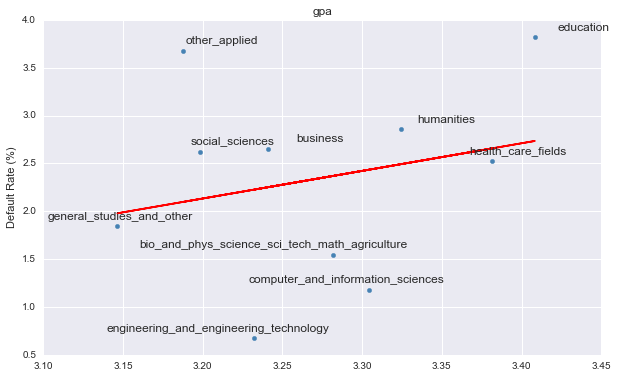

y=-0.000057x+(4.065014)


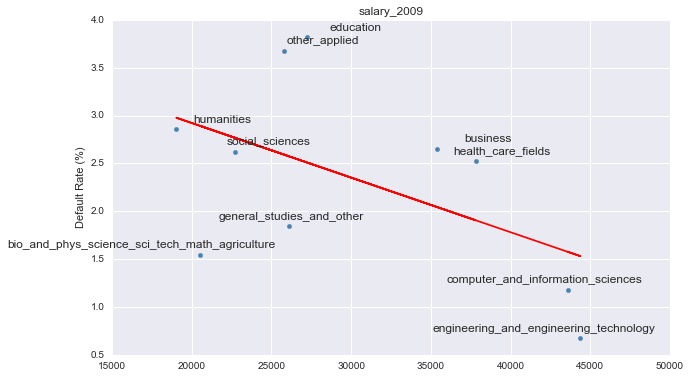

y=-0.000067x+(5.278713)


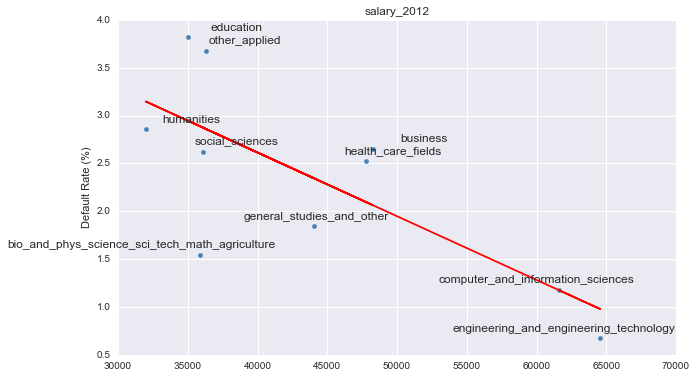

y=0.000285x+(-2.310349)


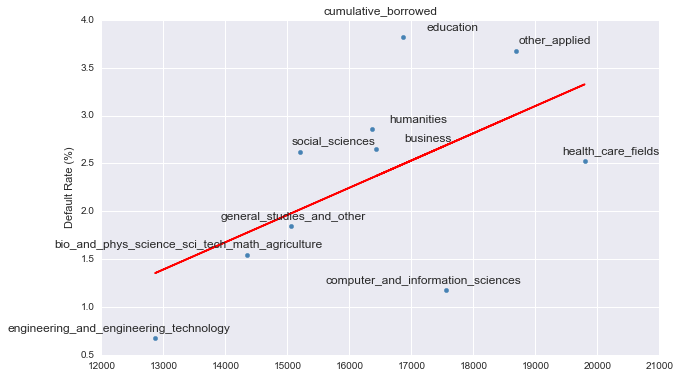

y=0.000450x+(0.853524)


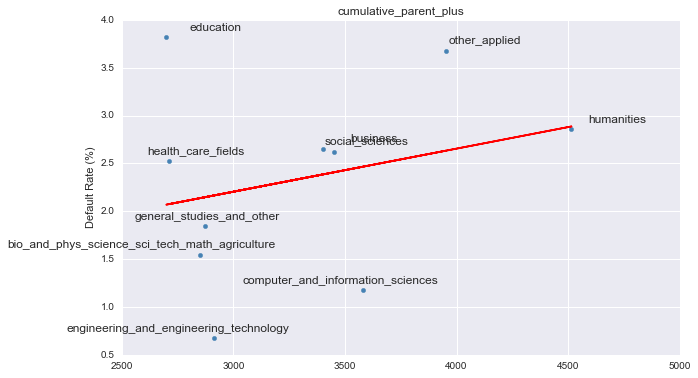

y=0.083860x+(-0.392058)


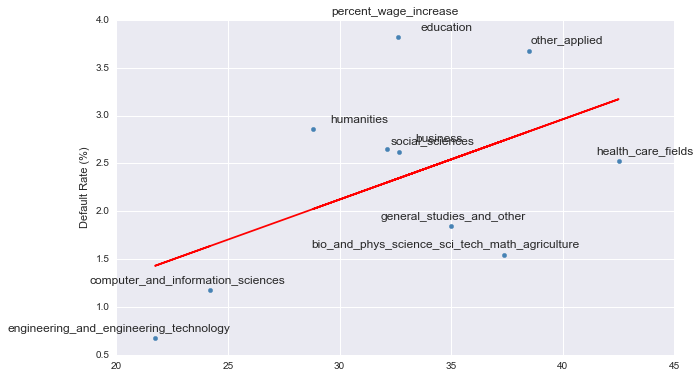

y=-0.000077x+(4.522340)


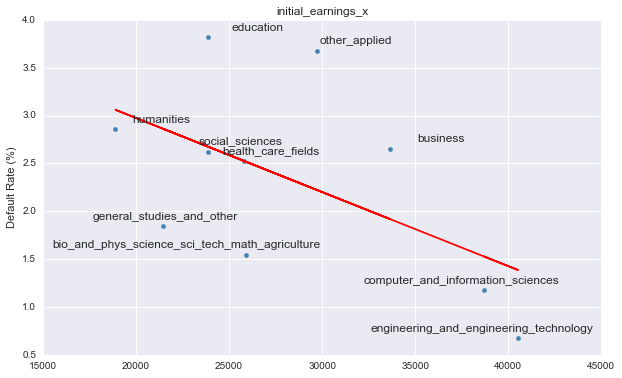

y=-0.000070x+(5.522660)


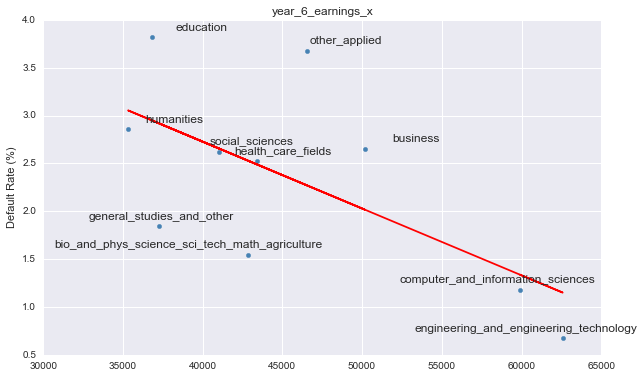

y=-0.000055x+(5.450644)


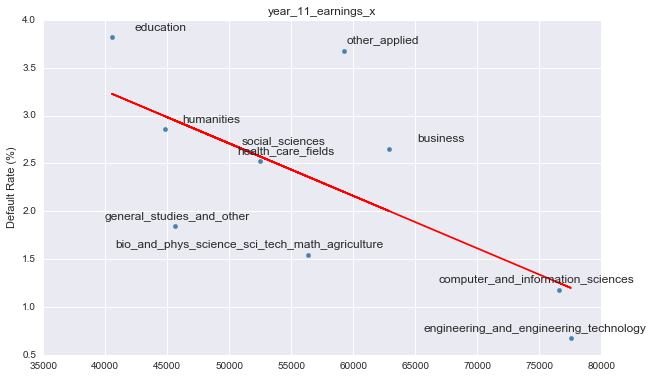

y=-0.000047x+(5.258420)


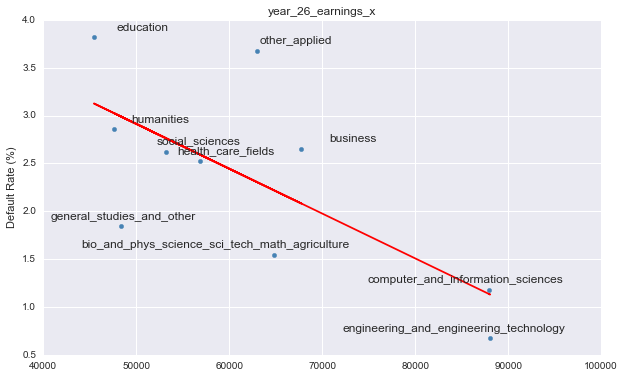

y=-0.340868x+(5.028886)


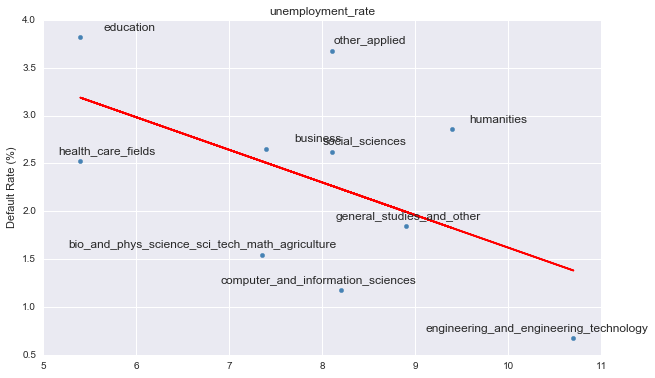

y=-0.000077x+(4.522340)


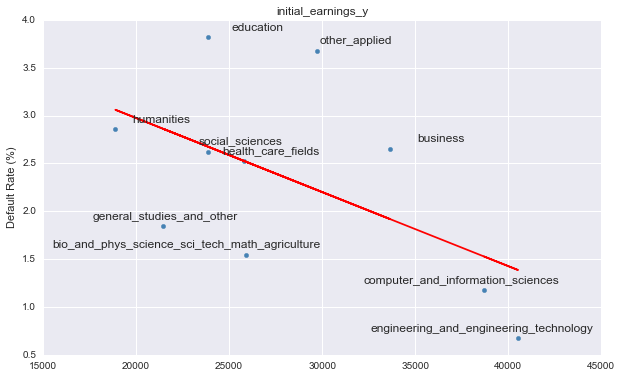

y=-0.000070x+(5.522660)


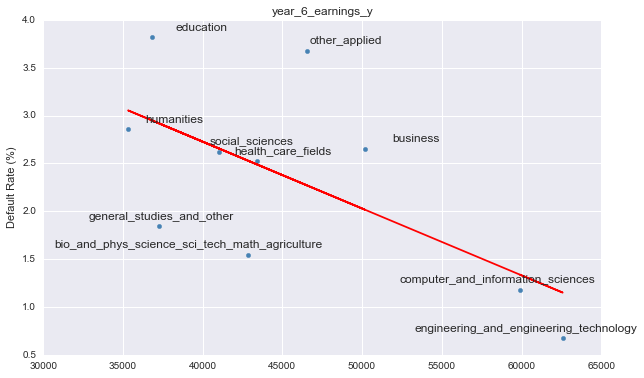

y=-0.000055x+(5.450644)


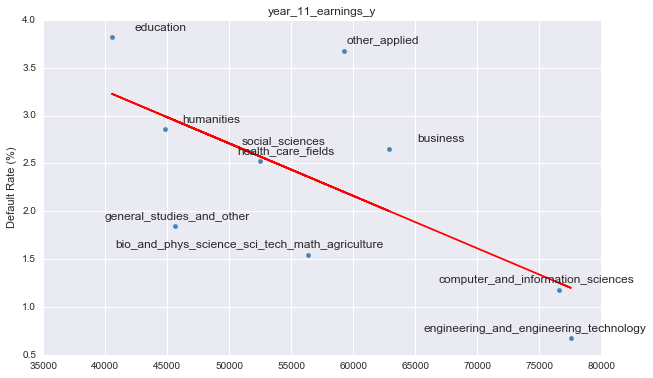

y=-0.000047x+(5.258420)


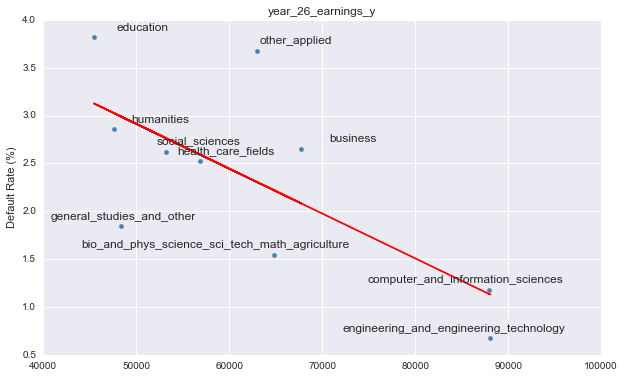

y=-0.166320x+(7.165699)


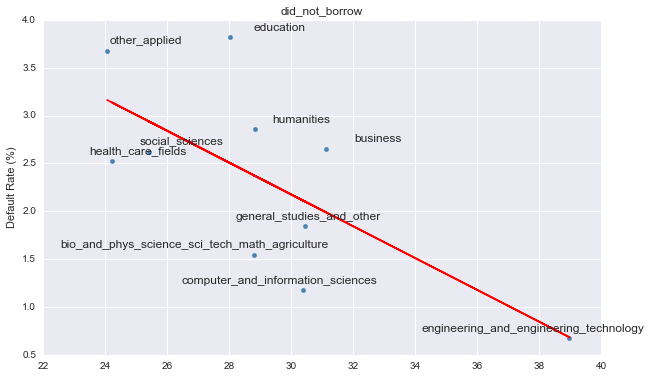

y=0.047747x+(1.699895)


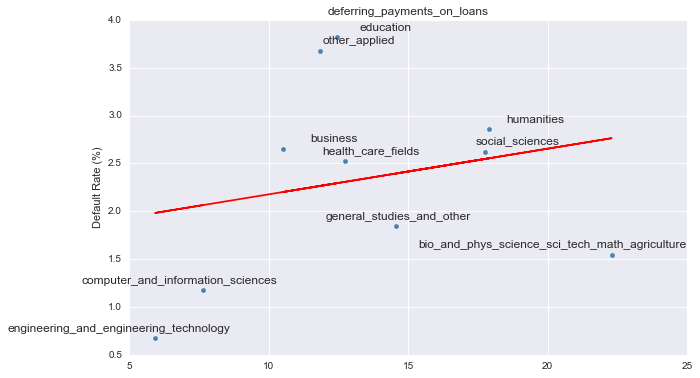

y=0.145666x+(-4.173045)


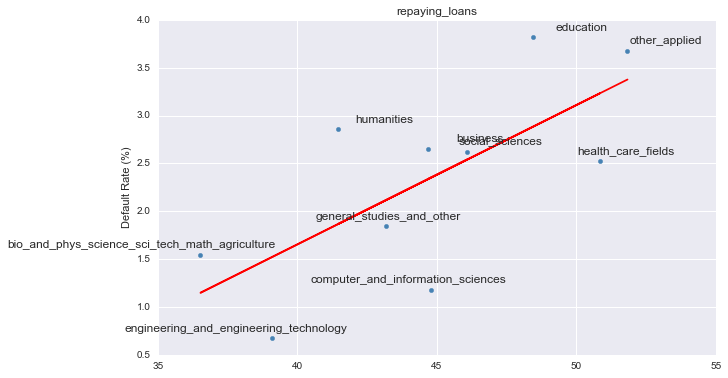

y=-0.301665x+(5.529025)


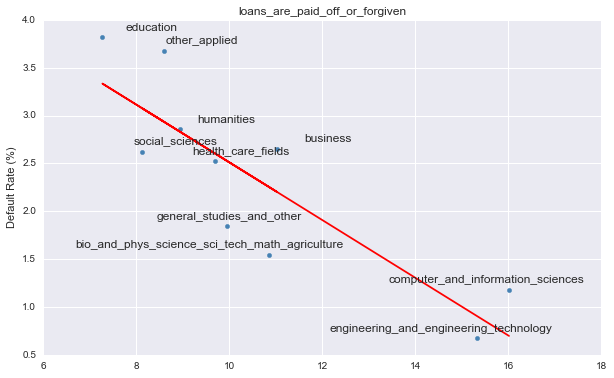

In [53]:
for key in df.keys()[1:-1]:
    figure = plt.figure(figsize=(10, 6))
    axes = figure.add_subplot(1, 1, 1)
    axes.set_title(key)
    axes.set_ylabel("Default Rate (%)")
    axes.scatter( df[key], df['defaulted'], marker="o", color="steelblue")
    # calc the trendline
    z = np.polyfit(df[key], df['defaulted'], 1)
    p = np.poly1d(z)
    plt.plot(df[key],p(df[key]),"r-")
    # the line equation:
    print "y=%.6fx+(%.6f)"%(z[0],z[1])
    for label, x, y in zip(df['major'], df[key], df['defaulted']):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (75, 5),
            textcoords = 'offset points', ha = 'right', va = 'bottom')
            #bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    plt.show()

Some of the points raised earlier during EDA reappear. For example, the small amount of variation in GPA results in a trend line whose range of default rates is only ~0.6%. As a comparison, the trend line for ‘initial salary in 2009’, has a default rate range of 1.5% and ‘salary in 2012’ has a default rate range of 2.2%. Assuming a larger range represents a more discriminative variable, ‘salary_2009’, ’salary_2012’, ‘cumlative_borrowed’, ‘percent_wage_increase’, and ’unemployment_rate’ seem to correlate with default rates per major.

This completes the EDA portion of this notebook. Next, I want to propose some charts for my project and the narrative they might explain.

First, I want to present a simple chart visualizing the average amount of debt categorized by major. The point of this chart is to enlighten the reader about how similar the debt burden is for students in different majors.

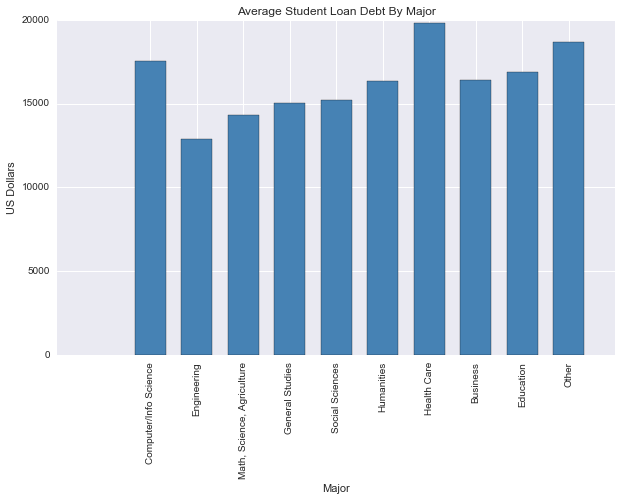

In [54]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title("Average Student Loan Debt By Major")
axes.set_xlabel("Major")
axes.set_ylabel("US Dollars")
width=1/1.5
axes.bar(xrange(df['major'].shape[0]), df['cumulative_borrowed'], width, color="steelblue", align="center")
axes.set_xticks(xrange(df['major'].shape[0]))
majors = ['Computer/Info Science', 'Engineering', 'Math, Science, Agriculture', 'General Studies', 'Social Sciences', 'Humanities', 'Health Care', 'Business', 'Education', 'Other']
axes.set_xticklabels(majors, rotation=90)

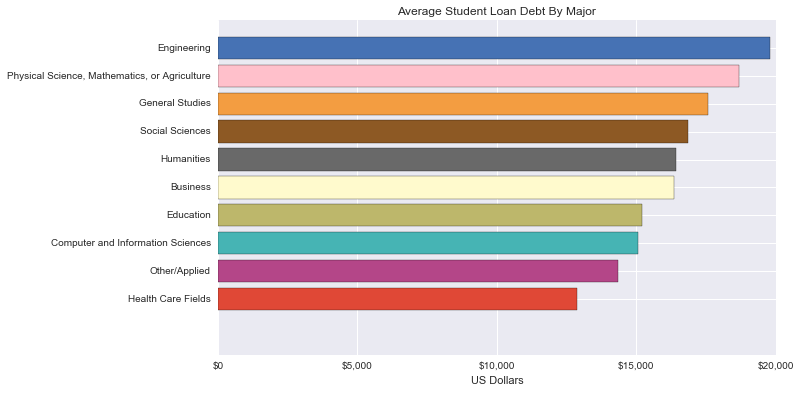

In [55]:
temp = df.sort_values('cumulative_borrowed', ascending=True)
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1,1,1)
axes.set_title("Average Student Loan Debt By Major")
axes.set_xlabel("US Dollars")
width=0.8
colors = list()
for major in temp['major']: 
    if 'engineering' in major:
        colors.append('#4672B4')
    elif 'agriculture' in major:
        colors.append('#FFC0CB')
    elif 'general_studies' in major:
        colors.append('#F39D41')
    elif 'social_sciences' in major:
        colors.append('#8D5924')
    elif 'humanities' in major:
        colors.append('#696969')
    elif 'business' in major:
        colors.append('#FFFACD')
    elif 'education' in major:
        colors.append('#BDB76B')
    elif 'information_sciences' in major:
        colors.append('#46B4B4')
    elif 'other_applied' in major:
        colors.append('#B44688')
    else:
        colors.append('#E04836')
colors.reverse()
axes.barh(xrange(temp['major'].shape[0]), temp['cumulative_borrowed'], width, color=colors, align="center")
majors = ['Health Care Fields', 'Other/Applied', 'Computer and Information Sciences', 'Education', 'Business', 'Humanities', 'Social Sciences', 'General Studies', 'Physical Science, Mathematics, or Agriculture', 'Engineering']
axes.set_yticks(xrange(temp['major'].shape[0]))
axes.set_yticklabels(majors)
axes.set_xticklabels(['$0', '$5,000', '$10,000', '$15,000', '$20,000'])
def autolabel(rects):
# attach some text labels
    for ii,rect in enumerate(rects):
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%s'% (name[ii]),
                ha='center', va='bottom')
plt.savefig('average_debt.png', bbox_inches='tight')

This next chart is of the default rates for each major. This contrasts well with the previous chart in that there is an obvious difference between each major's ability to pay back their loans.

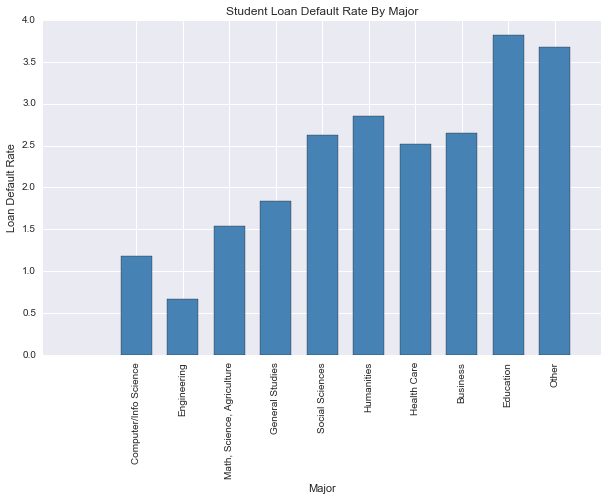

In [56]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title("Student Loan Default Rate By Major")
axes.set_xlabel("Major")
axes.set_ylabel("Loan Default Rate")
width=1/1.5
axes.bar(xrange(df['major'].shape[0]), df['defaulted'], width, color="steelblue", align="center")
axes.set_xticks(xrange(df['major'].shape[0]))
majors = ['Computer/Info Science', 'Engineering', 'Math, Science, Agriculture', 'General Studies', 'Social Sciences', 'Humanities', 'Health Care', 'Business', 'Education', 'Other']
axes.set_xticklabels(majors, rotation=90)

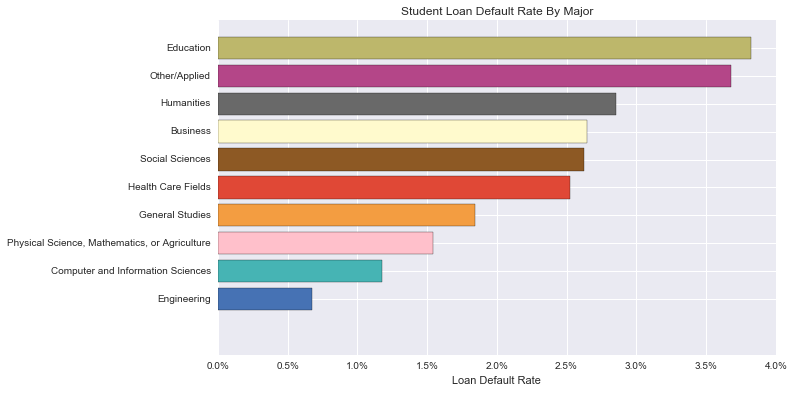

In [57]:
temp = df.sort_values('defaulted', ascending=True)
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title("Student Loan Default Rate By Major")
axes.set_xlabel("Loan Default Rate")
width=0.8
colors = list()
majors = list()
for major in temp['major']:
    if 'engineering' in major:
        colors.append('#4672B4')
        majors.append('Engineering')
    elif 'agriculture' in major:
        colors.append('#FFC0CB')
        majors.append('Physical Science, Mathematics, or Agriculture')
    elif 'general_studies' in major:
        colors.append('#F39D41')
        majors.append('General Studies')
    elif 'social_sciences' in major:
        colors.append('#8D5924')
        majors.append('Social Sciences')
    elif 'humanities' in major:
        colors.append('#696969')
        majors.append('Humanities')
    elif 'business' in major:
        colors.append('#FFFACD')
        majors.append('Business')
    elif 'education' in major:
        colors.append('#BDB76B')
        majors.append('Education')
    elif 'information_sciences' in major:
        colors.append('#46B4B4')
        majors.append('Computer and Information Sciences')
    elif 'other_applied' in major:
        colors.append('#B44688')
        majors.append('Other/Applied')
    else:
        colors.append('#E04836')
        majors.append('Health Care Fields')
axes.barh(xrange(temp['major'].shape[0]), temp['defaulted'], width, color=colors, align="center")
axes.set_yticks(xrange(temp['major'].shape[0]))
axes.set_yticklabels(majors)
axes.set_xticklabels(['0.0%', '0.5%', '1.0%', '1.5%', '2.0%', '2.5%', '3.0%', '3.5%', '4.0%'])
plt.savefig('default_rate.pdf', bbox_inches='tight')

To dispel any idea that default rate is correlated with low school performance, I next want to present a graph that shows the average GPA of each major. Two of the highest default rates belong to the highest performing majors as measured by GPA.

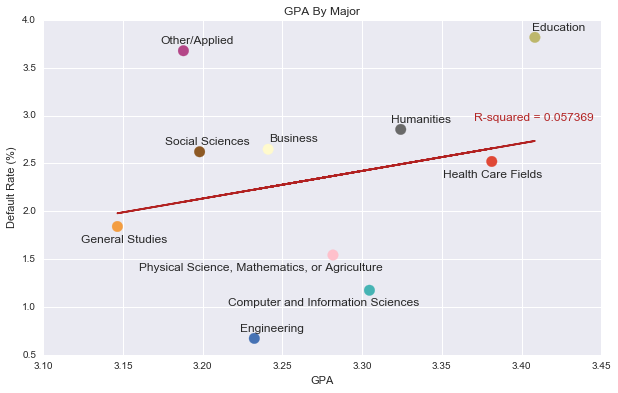

In [58]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title('GPA By Major')
axes.set_ylabel("Default Rate (%)")
axes.set_xlabel("GPA")

# calc the trendline
z = np.polyfit(df['gpa'], df['defaulted'], 1)
p = np.poly1d(z)
yhat = p(df['gpa'])
ybar = df['defaulted'].mean()
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((df['defaulted'] - ybar)**2)
r_squared = ssreg / sstot
plt.annotate('R-squared = %f' % r_squared,
            xy=(3.37, 2.95), textcoords='data',color='firebrick')
plt.plot(df['gpa'],p(df['gpa']),"-",color='firebrick')

# the line equation:
colors = list()
for label, x, y in zip(df['major'], df['gpa'], df['defaulted']):
    xytext = (50,5)
    if 'engineering' in label:
        colors.append('#4672B4')
        label = 'Engineering'
    elif 'agriculture' in label:
        colors.append('#FFC0CB')
        label = 'Physical Science, Mathematics, or Agriculture'
        xytext = (50,-18)
    elif 'general_studies' in label:
        colors.append('#F39D41')
        label = 'General Studies'
        xytext = (50,-18)
    elif 'social_sciences' in label:
        colors.append('#8D5924')
        label = 'Social Sciences'
    elif 'humanities' in label:
        colors.append('#696969')
        label = 'Humanities'
    elif 'business' in label:
        colors.append('#FFFACD')
        label = 'Business'
    elif 'education' in label:
        colors.append('#BDB76B')
        label = 'Education'
    elif 'information_sciences' in label:
        colors.append('#46B4B4')
        label = 'Computer and Information Sciences'
        xytext = (50,-18)
    elif 'other_applied' in label:
        colors.append('#B44688')
        label = 'Other/Applied'
    else:
        colors.append('#E04836')
        label = 'Health Care Fields'
        xytext = (50,-18)
    plt.annotate(
        label, 
        xy = (x, y), xytext = xytext,
        textcoords = 'offset points', ha = 'right', va = 'bottom')
axes.scatter( df['gpa'], df['defaulted'], s=np.pi * (2 *3) **2, color=colors)
plt.savefig('gpa_default_rate.pdf', bbox_inches='tight')
plt.show()

So what factors actually explain the golf in default rates? For one initial starting salary, where we find four of the top debt offenders also the majors that start out making the least money:

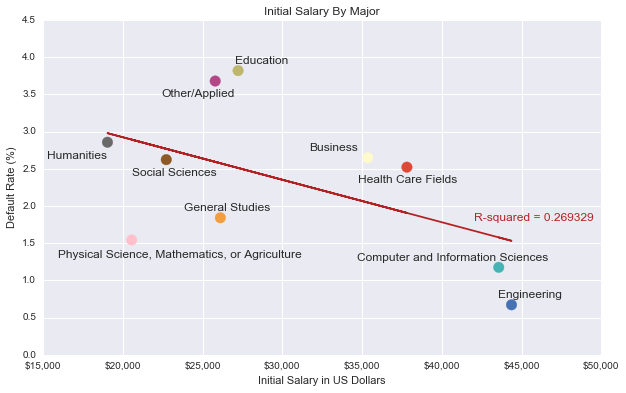

In [59]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title('Initial Salary By Major')
axes.set_ylabel("Default Rate (%)")
axes.set_xlabel("Initial Salary in US Dollars")
# calc the trendline
z = np.polyfit(df['salary_2009'], df['defaulted'], 1)
p = np.poly1d(z)
yhat = p(df['salary_2009'])
ybar = df['defaulted'].mean()
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((df['defaulted'] - ybar)**2)
r_squared = ssreg / sstot
plt.annotate('R-squared = %f' % r_squared,
            xy=(42000, 1.8), textcoords='data',color='firebrick')
plt.plot(df['salary_2009'],p(df['salary_2009']),"-",color='firebrick')

# the line equation:
colors = list()
for label, x, y in zip(df['major'], df['salary_2009'], df['defaulted']):
    xytext = (50,5)
    if 'engineering' in label:
        colors.append('#4672B4')
        label = 'Engineering'
    elif 'agriculture' in label:
        colors.append('#FFC0CB')
        label = 'Physical Science, Mathematics, or Agriculture'
        xytext = (170,-20)
    elif 'general_studies' in label:
        colors.append('#F39D41')
        label = 'General Studies'
    elif 'social_sciences' in label:
        colors.append('#8D5924')
        label = 'Social Sciences'
        xytext = (50, -18)
    elif 'humanities' in label:
        colors.append('#696969')
        label = 'Humanities'
        xytext = (0, -18)
    elif 'business' in label:
        colors.append('#FFFACD')
        label = 'Business'
        xytext = (-10, 5)
    elif 'education' in label:
        colors.append('#BDB76B')
        label = 'Education'
    elif 'information_sciences' in label:
        colors.append('#46B4B4')
        label = 'Computer and Information Sciences'
    elif 'other_applied' in label:
        colors.append('#B44688')
        label = 'Other/Applied'
        xytext = (20, -18)
    else:
        colors.append('#E04836')
        label = 'Health Care Fields'
        xytext = (50,-18)
    plt.annotate(
        label, 
        xy = (x, y), xytext = xytext,
        textcoords = 'offset points', ha = 'right', va = 'bottom')
axes.set_xticklabels(['$15,000', '$20,000', '$25,000', '$30,000', '$35,000', '$40,000', '$45,000', '$50,000'])
axes.scatter( df['salary_2009'], df['defaulted'], s=np.pi * (2 *3) **2, color=colors)
plt.savefig('inital_salary_default_rate.pdf', bbox_inches='tight')
plt.show()

This is even considering the majors with lowest unemployment are the ones most likely to default.

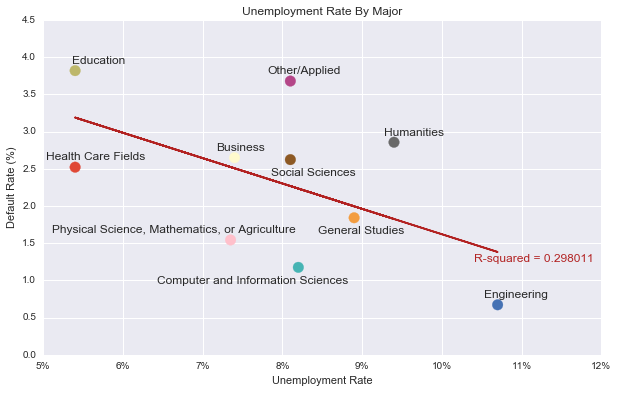

In [60]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title('Unemployment Rate By Major')
axes.set_ylabel("Default Rate (%)")
axes.set_xlabel("Unemployment Rate")

# calc the trendline
z = np.polyfit(df['unemployment_rate'], df['defaulted'], 1)
p = np.poly1d(z)
yhat = p(df['unemployment_rate'])
ybar = df['defaulted'].mean()
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((df['defaulted'] - ybar)**2)
r_squared = ssreg / sstot
plt.annotate('R-squared = %f' % r_squared,
            xy=(10.4, 1.25), textcoords='data',color='firebrick')
plt.plot(df['unemployment_rate'],p(df['unemployment_rate']),"-",color='firebrick')

for label, x, y in zip(df['major'], df['unemployment_rate'], df['defaulted']):
    xytext = (50,5)
    if 'engineering' in label:
        colors.append('#4672B4')
        label = 'Engineering'
    elif 'agriculture' in label:
        colors.append('#FFC0CB')
        label = 'Physical Science, Mathematics, or Agriculture'
        xytext = (65,5)
    elif 'general_studies' in label:
        colors.append('#F39D41')
        label = 'General Studies'
        xytext =(50,-18)
    elif 'social_sciences' in label:
        colors.append('#8D5924')
        label = 'Social Sciences'
        xytext = (65,-18)
    elif 'humanities' in label:
        colors.append('#696969')
        label = 'Humanities'
    elif 'business' in label:
        colors.append('#FFFACD')
        label = 'Business'
        xytext = (30,5)
    elif 'education' in label:
        colors.append('#BDB76B')
        label = 'Education'
    elif 'information_sciences' in label:
        colors.append('#46B4B4')
        label = 'Computer and Information Sciences'
        xytext = (50,-18)
    elif 'other_applied' in label:
        colors.append('#B44688')
        label = 'Other/Applied'
    else:
        colors.append('#E04836')
        label = 'Health Care Fields'
        xytext=(70,5)
    plt.annotate(
        label, 
        xy = (x, y), xytext = xytext,
        textcoords = 'offset points', ha = 'right', va = 'bottom')
axes.set_xticklabels(['5%', '6%', '7%', '8%', '9%', '10%', '11%', '12%'])
axes.scatter( df['unemployment_rate'], df['defaulted'], s=np.pi * (2 *3) **2, color=colors)
plt.savefig('unemploy_rate_default_rate.pdf', bbox_inches='tight')
plt.show()

When considering the size of raises seen by each major after going back and getting a Master's degree, we see five of the most debted majors generate the are in the top seven in graduate degree raises.

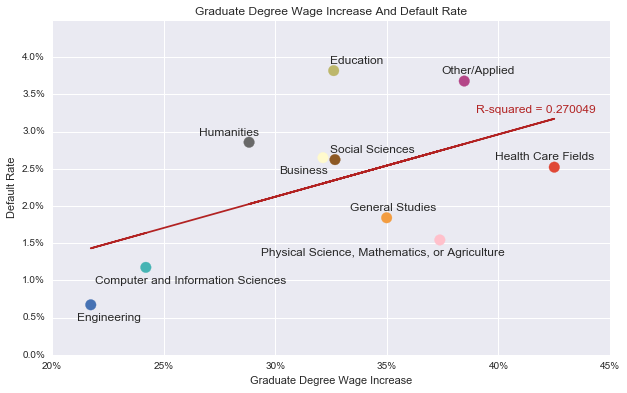

In [61]:
figure = plt.figure(figsize=(10, 6))
axes = figure.add_subplot(1, 1, 1)
axes.set_title('Graduate Degree Wage Increase And Default Rate')
axes.set_ylabel("Default Rate")
axes.set_xlabel("Graduate Degree Wage Increase")
# calc the trendline
z = np.polyfit(df['percent_wage_increase'], df['defaulted'], 1)
p = np.poly1d(z)
yhat = p(df['percent_wage_increase'])
ybar = df['defaulted'].mean()
ssreg = np.sum((yhat-ybar)**2)
sstot = np.sum((df['defaulted'] - ybar)**2)
r_squared = ssreg / sstot
plt.annotate('R-squared = %f' % r_squared,
            xy=(39, 3.25), textcoords='data',color='firebrick')
plt.plot(df['percent_wage_increase'],p(df['percent_wage_increase']),"r-",color="firebrick")
# the line equation:
colors = list()
for label, x, y in zip(df['major'], df['percent_wage_increase'], df['defaulted']):
    xytext = (50,5)
    if 'engineering' in label:
        colors.append('#4672B4')
        label = 'Engineering'
        xytext = (50,-18)
    elif 'agriculture' in label:
        colors.append('#FFC0CB')
        label = 'Physical Science, Mathematics, or Agriculture'
        xytext = (65,-18)
    elif 'general_studies' in label:
        colors.append('#F39D41')
        label = 'General Studies'
        xytext =(50,5)
    elif 'social_sciences' in label:
        colors.append('#8D5924')
        label = 'Social Sciences'
        xytext = (80,5)
    elif 'humanities' in label:
        colors.append('#696969')
        label = 'Humanities'
        xytext = (10,5)
    elif 'business' in label:
        colors.append('#FFFACD')
        label = 'Business'
        xytext = (5,-18)
    elif 'education' in label:
        colors.append('#BDB76B')
        label = 'Education'
    elif 'information_sciences' in label:
        colors.append('#46B4B4')
        label = 'Computer and Information Sciences'
        xytext = (140,-18)
    elif 'other_applied' in label:
        colors.append('#B44688')
        label = 'Other/Applied'
    else:
        colors.append('#E04836')
        label = 'Health Care Fields'
        xytext=(40,5)
    plt.annotate(
        label, 
        xy = (x, y), xytext = xytext,
        textcoords = 'offset points', ha = 'right', va = 'bottom')
axes.set_xticklabels(['20%', '25%', '30%', '35%', '40%', '45%'])
axes.set_yticklabels(['0.0%', '0.5%', '1.0%', '1.5%', '2.0%', '2.5%', '3.0%', '3.5%', '4.0%'])
axes.scatter( df['percent_wage_increase'], df['defaulted'], s=np.pi * (2 *3) **2, color=colors)
plt.savefig('graduate_increase_default_rate.pdf', bbox_inches='tight')
plt.show()

So if we were to characterize the highest offenders for defaulting student loans we'd see that they are the majors with the higest GPAs, lowest unemployment, highest raises for graduate degrees, but the lowest initial salaries. This reflects the reality reached by the Hamilton Project's study titled 'Major Decisions: Graduates’ Earnings Growth and Debt Repayment' that the amount of student loan borrowed by each major isn't the problem, rather it is the fact that the burden to repay occurs when careers are just starting and so earning is lowest.